# News data analysis 

In [1]:
#import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#load matplot style 'ggplot'
matplotlib.style.use('ggplot')
#load NLP library
import nltk

In [2]:
#loading data
news = pd.read_csv(r'D:\Downloads\Ds class notes\AI\news\news.csv')

## Exploring data 

In [3]:
news.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [4]:
news.shape

(6335, 4)

In [5]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
news.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

> 6335 rows and 4  Features(columns)

> zero null values

>data type :- object & int 

>one feature is unnamed so i gonna drop for next process


## Let's dig into fake news

In [7]:
# Drop a Unnamed column

news_data=  news.drop(['Unnamed: 0'], axis=1)
news_data.head(5)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
# Make a Fake_news data variable 
fake_news = news_data[news_data["label"] == "FAKE"]
#read fake news
fake_news.head(4)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE


In [9]:
fake_news.count()

title    3164
text     3164
label    3164
dtype: int64

In [10]:
# let's calculate fake news %
(news_data['label'].value_counts()/news_data.shape[0])*100

REAL    50.055249
FAKE    49.944751
Name: label, dtype: float64

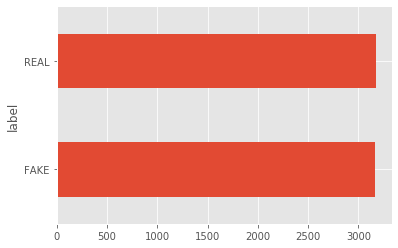

In [11]:
# Plot a bar graph 
news_data.groupby(['label']).size().plot(kind='barh')

In [12]:
fake_news['title'].value_counts()

Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids                                                                  3
Michael Moore Owes Me $4.99                                                                                                  3
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence                           3
The Fix Is In: NBC Affiliate Accidentally Posts Election Results A Week Early: Hillary Wins Presidency 42% to Trump’s 40%    2
Constitutional Law Expert: Comey Did NOT Violate Law By Announcing Email Investigation                                       2
                                                                                                                            ..
Re: 22 Reasons Why Starting World War 3 In The Middle East Is A Really Bad Idea                                              1
Best of Luck With the Wall                                                                                     

### Note :- Actually i wanted to create all fake news title in one Text but i don't know how , Now i just took one title and one text for practicing
>If we took all text from fake news we can predict the most frequent word appears the most that could be red flag for fake news

#### text from Fake news one title and one text

In [13]:
fake_news['title'][1]

'Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)'

In [14]:
text_v1=fake_news['text'][1]
text_v1

'Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two fundamental truths in this world: Paul Ryan desperately wants to be president. And Paul Ryan will never be president. Today proved it. \nIn a particularly staggering example of political cowardice, Paul Ryan re-re-re-reversed course and announced that he was back on the Trump Train after all. This was an aboutface from where he was a few weeks ago. He had previously declared he would not be supporting or defending Trump after a tape was made public in which Trump bragged about assaulting women. Suddenly, Ryan was appearing at a pro-Trump rally and boldly declaring that he already sent in his vote to make him President of the United States. It was a surreal moment. The figurehead of the Republican Party dosed himself in gasoline, got up on a stage on a chilly afternoon in Wisconsin, and lit a match. . @SpeakerRyan says he voted for @realDonaldTrump : “Republicans, it is time to come home” ht

### Let's Remove the StopWord
>create a funtion to remove stop words

In [15]:
from nltk.corpus import stopwords

def remove_stopword(text,lang='english'):
    words = nltk.word_tokenize(text)
    lang_stopword = stopwords.words(lang)
    stopword_removed = [w for w in words if w.lower() not in lang_stopword]
    
    return " ".join(stopword_removed)

text_v01=remove_stopword(text_v1)
text_v01

'Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr two fundamental truths world : Paul Ryan desperately wants president . Paul Ryan never president . Today proved . particularly staggering example political cowardice , Paul Ryan re-re-re-reversed course announced back Trump Train . aboutface weeks ago . previously declared would supporting defending Trump tape made public Trump bragged assaulting women . Suddenly , Ryan appearing pro-Trump rally boldly declaring already sent vote make President United States . surreal moment . figurehead Republican Party dosed gasoline , got stage chilly afternoon Wisconsin , lit match . . @ SpeakerRyan says voted @ realDonaldTrump : “ Republicans , time come home ” https : //t.co/VyTT49YvoE pic.twitter.com/wCvSCg4a5I — ABC News Politics ( @ ABCPolitics ) November 5 , 2016 Democratic Party ’ asked better moment film . Ryan ’ chances ever becoming president went zero instant . wreckage Trump leave behind wake , cravenly bac

### Now Remove Punctuations
>create a Funtion to remove punctuations

In [16]:
import string
def remove_punct(text):
    words = nltk.word_tokenize(text)
    punct_removed = [w for w in words if w.lower() not in string.punctuation]
    
    return " ".join(punct_removed)

text_v02=remove_punct(text_v01)
text_v02

'Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr two fundamental truths world Paul Ryan desperately wants president Paul Ryan never president Today proved particularly staggering example political cowardice Paul Ryan re-re-re-reversed course announced back Trump Train aboutface weeks ago previously declared would supporting defending Trump tape made public Trump bragged assaulting women Suddenly Ryan appearing pro-Trump rally boldly declaring already sent vote make President United States surreal moment figurehead Republican Party dosed gasoline got stage chilly afternoon Wisconsin lit match SpeakerRyan says voted realDonaldTrump “ Republicans time come home ” https //t.co/VyTT49YvoE pic.twitter.com/wCvSCg4a5I — ABC News Politics ABCPolitics November 5 2016 Democratic Party ’ asked better moment film Ryan ’ chances ever becoming president went zero instant wreckage Trump leave behind wake cravenly backed campaign recover Ryan ’ career manages limp way 20

### Remove white space and Numbers
>create Funtion to remove whitespace & Numbers

In [17]:
import re
def remove_whitespace(text):
    return ' '.join(text.split())

def remove_number(text):
    return re.sub(r'\d+','',text)

textv03=remove_whitespace(text_v02)
textv03

'Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr two fundamental truths world Paul Ryan desperately wants president Paul Ryan never president Today proved particularly staggering example political cowardice Paul Ryan re-re-re-reversed course announced back Trump Train aboutface weeks ago previously declared would supporting defending Trump tape made public Trump bragged assaulting women Suddenly Ryan appearing pro-Trump rally boldly declaring already sent vote make President United States surreal moment figurehead Republican Party dosed gasoline got stage chilly afternoon Wisconsin lit match SpeakerRyan says voted realDonaldTrump “ Republicans time come home ” https //t.co/VyTT49YvoE pic.twitter.com/wCvSCg4a5I — ABC News Politics ABCPolitics November 5 2016 Democratic Party ’ asked better moment film Ryan ’ chances ever becoming president went zero instant wreckage Trump leave behind wake cravenly backed campaign recover Ryan ’ career manages limp way 20

### N- gram 
>In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus 

In [18]:
from nltk.util import ngrams
from collections import Counter


def get_grams(text, n):
    n_grams = ngrams(nltk.word_tokenize(text),n)
    return [' '.join(grams) for grams in n_grams]

print('1-Gram',get_grams(textv03, 1))

1-Gram ['Google', 'Pinterest', 'Digg', 'Linkedin', 'Reddit', 'Stumbleupon', 'Print', 'Delicious', 'Pocket', 'Tumblr', 'two', 'fundamental', 'truths', 'world', 'Paul', 'Ryan', 'desperately', 'wants', 'president', 'Paul', 'Ryan', 'never', 'president', 'Today', 'proved', 'particularly', 'staggering', 'example', 'political', 'cowardice', 'Paul', 'Ryan', 're-re-re-reversed', 'course', 'announced', 'back', 'Trump', 'Train', 'aboutface', 'weeks', 'ago', 'previously', 'declared', 'would', 'supporting', 'defending', 'Trump', 'tape', 'made', 'public', 'Trump', 'bragged', 'assaulting', 'women', 'Suddenly', 'Ryan', 'appearing', 'pro-Trump', 'rally', 'boldly', 'declaring', 'already', 'sent', 'vote', 'make', 'President', 'United', 'States', 'surreal', 'moment', 'figurehead', 'Republican', 'Party', 'dosed', 'gasoline', 'got', 'stage', 'chilly', 'afternoon', 'Wisconsin', 'lit', 'match', 'SpeakerRyan', 'says', 'voted', 'realDonaldTrump', '“', 'Republicans', 'time', 'come', 'home', '”', 'https', '//t.co

### Bigram
>A bigram or digram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. A bigram is an n-gram for n=2

In [19]:
# remove punct
text = remove_punct(textv03)

# Extracting bigrams
result = get_grams(text,1)

# counting bigrams
result_count = Counter(result) 

print("Words:", result_count.keys()) # Bigrams
print("\n Frequency:",result_count.values())

import pandas as pd
df = pd.DataFrame.from_dict(result_count,orient='index')
df = df.rename(columns={'index':'Words',0:'Frequency'})
df

Words: dict_keys(['Google', 'Pinterest', 'Digg', 'Linkedin', 'Reddit', 'Stumbleupon', 'Print', 'Delicious', 'Pocket', 'Tumblr', 'two', 'fundamental', 'truths', 'world', 'Paul', 'Ryan', 'desperately', 'wants', 'president', 'never', 'Today', 'proved', 'particularly', 'staggering', 'example', 'political', 'cowardice', 're-re-re-reversed', 'course', 'announced', 'back', 'Trump', 'Train', 'aboutface', 'weeks', 'ago', 'previously', 'declared', 'would', 'supporting', 'defending', 'tape', 'made', 'public', 'bragged', 'assaulting', 'women', 'Suddenly', 'appearing', 'pro-Trump', 'rally', 'boldly', 'declaring', 'already', 'sent', 'vote', 'make', 'President', 'United', 'States', 'surreal', 'moment', 'figurehead', 'Republican', 'Party', 'dosed', 'gasoline', 'got', 'stage', 'chilly', 'afternoon', 'Wisconsin', 'lit', 'match', 'SpeakerRyan', 'says', 'voted', 'realDonaldTrump', '“', 'Republicans', 'time', 'come', 'home', '”', 'https', '//t.co/VyTT49YvoE', 'pic.twitter.com/wCvSCg4a5I', '—', 'ABC', 'News

,Frequency
Google,1
Pinterest,1
Digg,1
Linkedin,1
Reddit,1
...,...
events,1
Featured,1
image,1
via,1


In [20]:
type(df.index)

pandas.core.indexes.base.Index

In [21]:
df.reset_index(inplace=True)

In [22]:
df

,index,Frequency
0,Google,1
1,Pinterest,1
2,Digg,1
3,Linkedin,1
4,Reddit,1
...,...,...
208,events,1
209,Featured,1
210,image,1
211,via,1


(array([194.,  13.,   2.,   1.,   0.,   0.,   0.,   1.,   1.,   1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

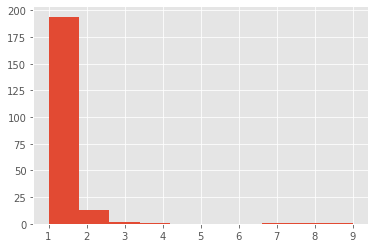

In [23]:
plt.hist(df['Frequency'])

>Here the most number of word appears in fake news text is 1

>If we merge all fake news text coulumn maybe have some frequent words

### Create a word cloud 
> To visualize most frequent word

In [24]:
# Fill any blank fields
fake_news.title.fillna("", inplace=True)
fake_news.text.fillna("", inplace=True)
# Join the title and text
all_text = fake_news.title.str.cat(fake_news.text, sep=' ')
# Tokenize. The NLTK tokenizer 
words = nltk.word_tokenize(" ".join(all_text.tolist()))

C:\Users\sanja\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
from nltk.corpus import stopwords
import string

# clearly more cleaning is needed here, but really I should get a better tokenizer
stop = stopwords.words('english') 
cleanwords = [i for i in words if i not in stop and i.isalpha() and len(i) > 2]

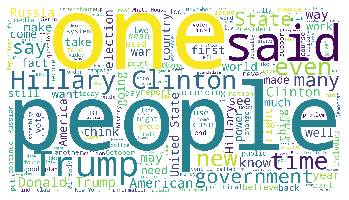

In [26]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(stopwords=STOPWORDS,background_color='white',width=1800,height=1000).generate(" ".join(cleanwords))

plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

> Most frequent word from fake news text are 'People, one ,said,trump'

## Build a models

In [27]:
# import required librarys 
from nltk.util import ngrams
from collections import Counter
# split the raw data
from sklearn.model_selection import train_test_split 
# Models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#error matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#### split datasets into a Test and train sets 

In [28]:
# create indipendent variable
y = news_data.label 
#drop dependent veriables
news_data.drop("label", axis=1)
# split Test and train data 33% for test data 
X_train, X_test, y_train, y_test = train_test_split(news_data['text'], y, test_size=0.33)

In [29]:
# open train& test data
print(X_train.head(5))
print(y_train.head(5))

4833    DISPATCHES FROM DANIEL ESPINOSA working to def...
1058    Monsanto Behind 4-Years-in-the-Making, Failed ...
640     A Texas jury reached a guilty verdict in the m...
3064    14 Shares\n4 9 0 1\nIt's a heartwarming moment...
5947     Trump is The Lesser Evil Because Hes Such a ...
Name: text, dtype: object
4833    FAKE
1058    FAKE
640     REAL
3064    FAKE
5947    FAKE
Name: label, dtype: object


### CountVectorizer
>Convert a collection of text documents to a matrix of token counts

This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

In [30]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
Cv_X_train_fit = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
Cv_X_test_fit = count_vectorizer.transform(X_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(Cv_X_train_fit,  y_train)
Cv_y_pred = classifier.predict(Cv_X_test_fit)

#### confusion matrix

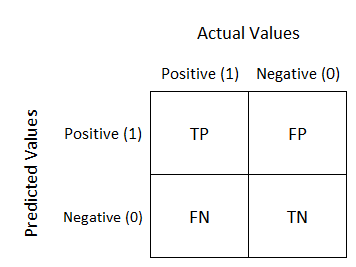

In [32]:
 from IPython.display import Image
Image("D:\Downloads\Ds class notes\AI/confusion matrix.png")

In [33]:
Cv_con_matrix = confusion_matrix(y_test,Cv_y_pred)
print('Fake','Real')
print(Cv_con_matrix)

Fake Real
[[878 183]
 [177 853]]


>print True and False values

>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [34]:
tn, fp, fn, tp = confusion_matrix(y_test,Cv_y_pred).ravel()
print('TN,FP,FN,TP')
(tn, fp, fn, tp)

TN,FP,FN,TP


(878, 183, 177, 853)

In [35]:
Cv_accuracy = metrics.accuracy_score(y_test, Cv_y_pred)*100
Cv_accuracy

82.78335724533716

> this model have high number of TP and TN

>And accuracy 81%

### TfidfVectorizer
>Convert a collection of raw documents to a matrix of TF-IDF features.

Equivalent to CountVectorizer followed by TfidfTransformer.

In [36]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train_x = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test_x = tfidf_vectorizer.transform(X_test)

In [37]:
classifier_tfdf = DecisionTreeClassifier(criterion='entropy')
classifier_tfdf.fit(tfidf_train_x, y_train)
tfdf_y_pred = classifier.predict(tfidf_test_x)

In [38]:
Tfidf_matrix =confusion_matrix(y_test, tfdf_y_pred)
print('FAKE',"REAL")
print(Tfidf_matrix)

FAKE REAL
[[1060    1]
 [1020   10]]


In [39]:
TN,FP,FN,TP = confusion_matrix(y_test,tfdf_y_pred).ravel()
print('TN,FP,FN,TP')
TN,FP,FN,TP

TN,FP,FN,TP


(1060, 1, 1020, 10)

> in this model TN have 1040 values and TP low 8 this isn't good model 

>need to improve this model

In [40]:
tfidf_accuracy= metrics.accuracy_score(y_test, tfdf_y_pred )*100
tfidf_accuracy

51.17168818747011

> We should use normalization to incress acuuracy 

>CountVectorizer model are better than TfidfVectorizer model


In [41]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

In [42]:
# fit a model
PA_classifier=PassiveAggressiveClassifier(max_iter=50)
PA_classifier.fit(tfidf_train_x,y_train)
#Predict testset
y_pred_PA=PA_classifier.predict(tfidf_test_x)
#calculate accuracy
accuracy =accuracy_score(y_test,y_pred_PA)

In [43]:
print('accuracy:  ',accuracy*100)

accuracy:   93.54375896700144


In [44]:
TN,FP,FN,TP = confusion_matrix(y_test,y_pred_PA).ravel()
print('TN,FP,FN,TP')
TN,FP,FN,TP

TN,FP,FN,TP


(991, 70, 65, 965)